1. Setup and Load Data

1.1 Setup

In [1]:
import tensorflow as tf
import os

In [2]:
cpus = tf.config.experimental.list_physical_devices('CPU')
cpus

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

1.2 Remove dodgy images

In [3]:
import cv2
import imghdr

C:\Users\Anubhav Trithahi\AppData\Local\Temp\ipykernel_23380\4232469594.py:2: DeprecationWarning: 'imghdr' is deprecated and slated for removal in Python 3.13
  import imghdr


In [4]:
data_dir = 'dataset'

In [5]:
os.listdir(data_dir)

['no', 'yes']

In [6]:
image_exts = ['jpeg', 'jpg', 'bmp', 'png']
image_exts

['jpeg', 'jpg', 'bmp', 'png']

In [7]:
for image_class in os.listdir(data_dir):
    print(image_class)

no
yes


In [8]:
image = cv2.imread(os.path.join('dataset','no', '001.jpg'))
image.shape

(2048, 3072, 3)

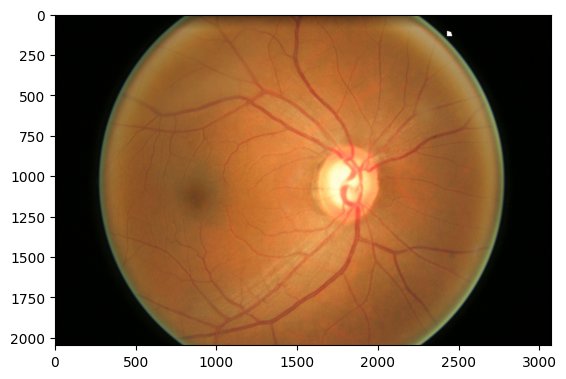

In [9]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

In [10]:
for image_class in os.listdir(data_dir):
    for image in os.listdir(os.path.join(data_dir, image_class)):
        image_path = os.path.join(data_dir, image_class, image)
        try:
            img = cv2.imread(image_path)
            tip = imghdr.what(image_path)
            if tip not  in image_exts:
                print('Image not in ext list {}'.format(image_path))
                os.remove(image_path)
        except Exception as e:
            print('Issue with image {}'.format(image_path))

1.3 Load Data

In [11]:
# load data using keras.utils
tf.data.Dataset??

Init signature: tf.data.Dataset(variant_tensor)
Source:        
@tf_export("data.Dataset", v1=[])
class DatasetV2(
    collections_abc.Iterable,
    tracking_base.Trackable,
    composite_tensor.CompositeTensor,
    data_types.DatasetV2,
    metaclass=abc.ABCMeta):
  """Represents a potentially large set of elements.

  The `tf.data.Dataset` API supports writing descriptive and efficient input
  pipelines. `Dataset` usage follows a common pattern:

  1. Create a source dataset from your input data.
  2. Apply dataset transformations to preprocess the data.
  3. Iterate over the dataset and process the elements.

  Iteration happens in a streaming fashion, so the full dataset does not need to
  fit into memory.

  Source Datasets:

  The simplest way to create a dataset is to create it from a python `list`:

  >>> dataset = tf.data.Dataset.from_tensor_slices([1, 2, 3])
  >>> for element in dataset:
  ...   print(element)
  tf.Tensor(1, shape=(), dtype=int32)
  tf.Tensor(2, shape=(), dty

In [12]:
import numpy as np
from matplotlib import pyplot as plt

In [13]:
tf.keras.utils.image_dataset_from_directory??

Signature:
tf.keras.utils.image_dataset_from_directory(
    directory,
    labels='inferred',
    label_mode='int',
    class_names=None,
    color_mode='rgb',
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation='bilinear',
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
)
Source:   
@keras_export(
    "keras.utils.image_dataset_from_directory",
    "keras.preprocessing.image_dataset_from_directory",
    v1=[],
)
def image_dataset_from_directory(
    directory,
    labels="inferred",
    label_mode="int",
    class_names=None,
    color_mode="rgb",
    batch_size=32,
    image_size=(256, 256),
    shuffle=True,
    seed=None,
    validation_split=None,
    subset=None,
    interpolation="bilinear",
    follow_links=False,
    crop_to_aspect_ratio=False,
    **kwargs,
):
    """Generates a `tf.data.Dataset` from image files in a directory.

    If your directory structure is:



In [14]:
data = tf.keras.utils.image_dataset_from_directory('dataset')

Found 650 files belonging to 2 classes.


In [15]:
data

<_BatchDataset element_spec=(TensorSpec(shape=(None, 256, 256, 3), dtype=tf.float32, name=None), TensorSpec(shape=(None,), dtype=tf.int32, name=None))>

In [16]:
data_iterator = data.as_numpy_iterator()
data_iterator

In [17]:
batch = data_iterator.next()
len(batch)
# output 2 represents images and labels

2

In [18]:
# Images represented as numpy arrays
# Images in key 0
# Labels in key 1
batch[0].shape

(32, 256, 256, 3)

In [19]:
# CLASS 0 equal Mild DR
# CLASS 1 equal Moderate DR
# CLASS 2 equal No DR
# CLASS 3 equal Proliferative DR
# CLASS 4 equal Severe DR
batch[1]

array([0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

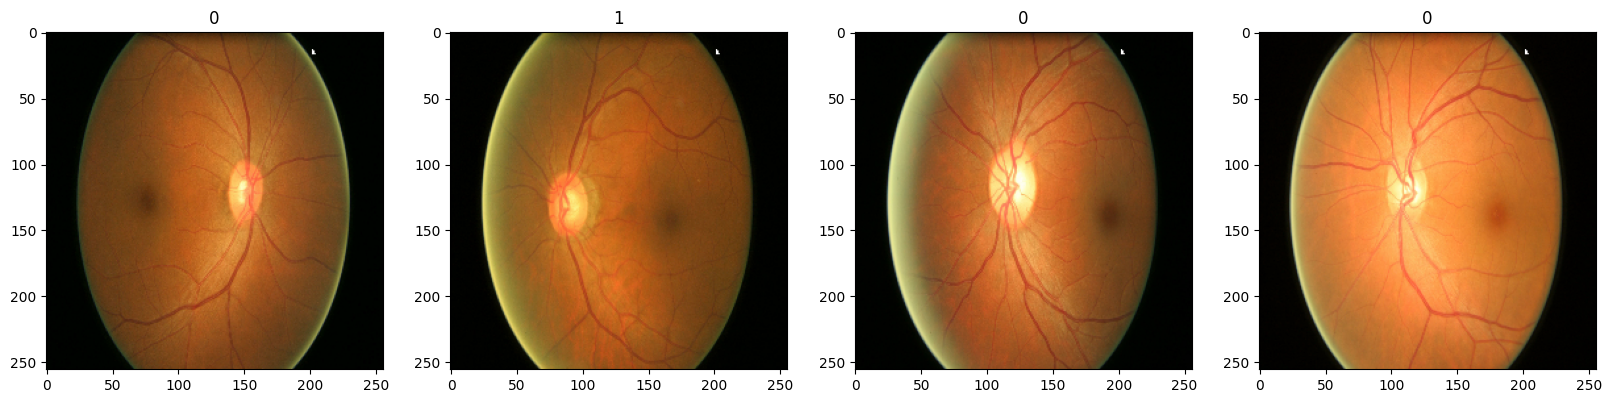

In [20]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img.astype(int))
    ax[idx].title.set_text(batch[1][idx])

In [21]:
batch[0].max()

255.0

In [22]:
scaled = batch[0]/255
scaled.max()

1.0

2. Preprocess Data

2.1 Scale Data

In [23]:
data = data.map(lambda x,y: (x/255, y))

In [24]:
# Images
scaled_iterator = data.as_numpy_iterator()

In [25]:
batch = scaled_iterator.next()

In [26]:
batch[0].max()

1.0

In [27]:
batch[0].min()

0.0

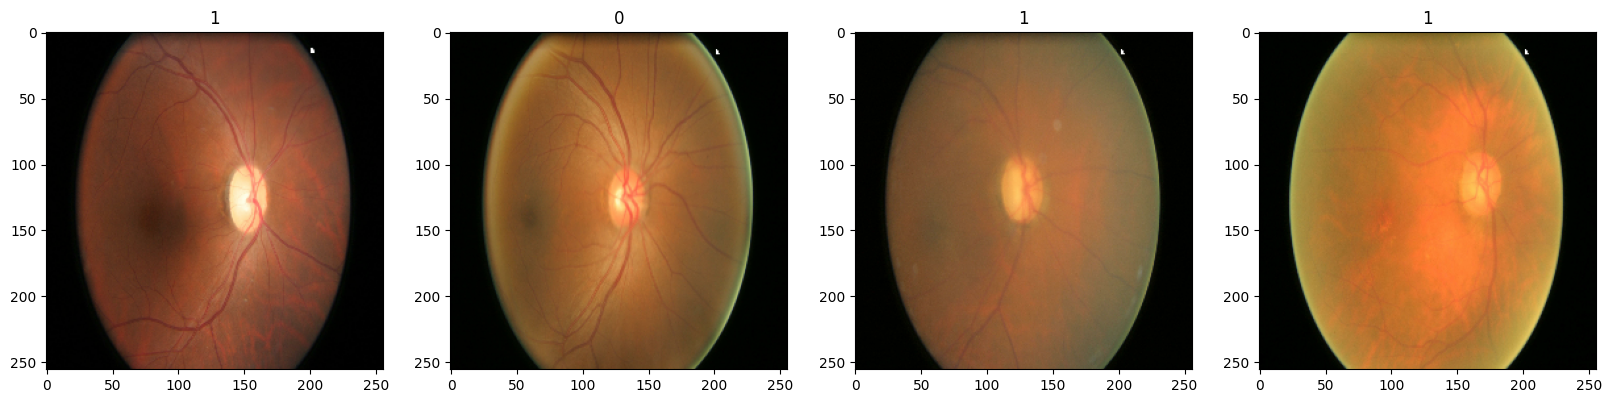

In [28]:
fig, ax = plt.subplots(ncols=4, figsize=(20,20))
for idx,img in enumerate(batch[0][:4]):
    ax[idx].imshow(img)
    ax[idx].title.set_text(batch[1][idx])

2.2 Split Data

In [29]:
len(data)

21

In [30]:
train_size = int(len(data)*.7)
val_size = int(len(data)*.2)+1
test_size = int(len(data)*.1)+1

In [31]:
train_size

14

In [32]:
train_size+val_size+test_size

22

In [33]:
train = data.take(train_size)
val = data.skip(train_size).take(val_size)
test = data.skip(train_size+val_size).take(test_size)

In [34]:
len(test)

2

3. Deep Model

3.1 Build Deep Learning Model

In [35]:
# We have one more model ie Functional model which is used for multiple inputs and outputas
from tensorflow.keras.models import Sequential
# Now layers
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Dense, Flatten, Dropout

In [36]:
model = Sequential()

In [37]:
Conv2D??

Init signature:
Conv2D(
    filters,
    kernel_size,
    strides=(1, 1),
    padding='valid',
    data_format=None,
    dilation_rate=(1, 1),
    groups=1,
    activation=None,
    use_bias=True,
    kernel_initializer='glorot_uniform',
    bias_initializer='zeros',
    kernel_regularizer=None,
    bias_regularizer=None,
    activity_regularizer=None,
    kernel_constraint=None,
    bias_constraint=None,
    **kwargs,
)
Source:        
@keras_export("keras.layers.Conv2D", "keras.layers.Convolution2D")
class Conv2D(Conv):
    """2D convolution layer (e.g. spatial convolution over images).

    This layer creates a convolution kernel that is convolved
    with the layer input to produce a tensor of
    outputs. If `use_bias` is True,
    a bias vector is created and added to the outputs. Finally, if
    `activation` is not `None`, it is applied to the outputs as well.

    When using this layer as the first layer in a model,
    provide the keyword argument `input_shape`
    (tuple of i

In [38]:
# 
model.add(Conv2D(16, (3,3), 1, activation='relu', input_shape=(256,256,3)))
model.add(MaxPooling2D())

model.add(Conv2D(32, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Conv2D(16, (3,3), 1, activation='relu'))
model.add(MaxPooling2D())

model.add(Flatten())

model.add(Dense(256, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

In [39]:
model.compile('adam', loss=tf.losses.BinaryCrossentropy(), metrics=['accuracy'])

In [40]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 254, 254, 16)      448       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 127, 127, 16)     0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 125, 125, 32)      4640      
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 62, 62, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 60, 60, 16)        4624      
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 30, 30, 16)       0

3.2 Train

In [41]:
logdir = 'logs_Glaucoma'

In [42]:
tensorboard_callback = tf.keras.callbacks.TensorBoard(log_dir=logdir)

In [43]:
hist = model.fit(train, epochs=20, validation_data=val, callbacks=[tensorboard_callback])

Epoch 1/20
14/14 [==============================] - 19s 1s/step - loss: 0.6312 - accuracy: 0.7589 - val_loss: 0.6142 - val_accuracy: 0.7312
Epoch 2/20
14/14 [==============================] - 19s 1s/step - loss: 0.5846 - accuracy: 0.7455 - val_loss: 0.6058 - val_accuracy: 0.7125
Epoch 3/20
14/14 [==============================] - 19s 1s/step - loss: 0.5744 - accuracy: 0.7411 - val_loss: 0.5536 - val_accuracy: 0.7812
Epoch 4/20
14/14 [==============================] - 19s 1s/step - loss: 0.5596 - accuracy: 0.7612 - val_loss: 0.5933 - val_accuracy: 0.7563
Epoch 5/20
14/14 [==============================] - 18s 1s/step - loss: 0.5715 - accuracy: 0.7679 - val_loss: 0.5852 - val_accuracy: 0.7250
Epoch 6/20
14/14 [==============================] - 16s 1s/step - loss: 0.5843 - accuracy: 0.7299 - val_loss: 0.5981 - val_accuracy: 0.7125
Epoch 7/20
14/14 [==============================] - 16s 1s/step - loss: 0.5614 - accuracy: 0.7455 - val_loss: 0.5933 - val_accuracy: 0.7000
Epoch 8/20
14/14 [==

3.3 Plot Performance

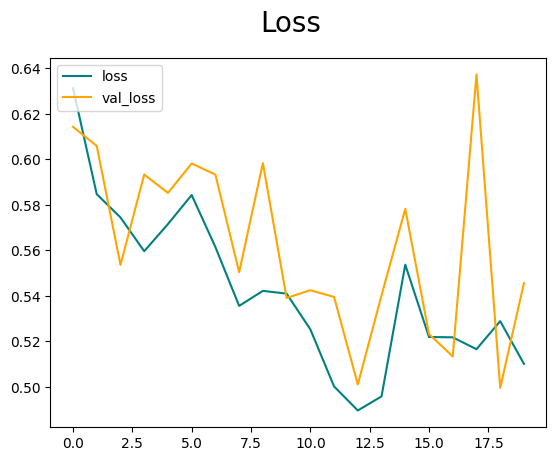

In [44]:
fig = plt.figure()
plt.plot(hist.history['loss'], color='teal', label='loss')
plt.plot(hist.history['val_loss'], color='orange', label='val_loss')
fig.suptitle('Loss', fontsize=20)
plt.legend(loc="upper left")
plt.show()

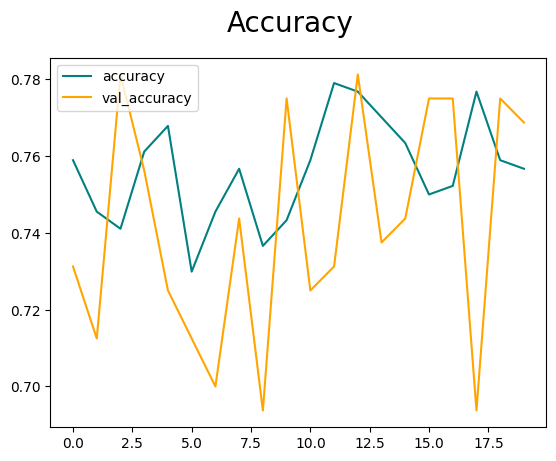

In [45]:
fig = plt.figure()
plt.plot(hist.history['accuracy'], color='teal', label='accuracy')
plt.plot(hist.history['val_accuracy'], color='orange', label='val_accuracy')
fig.suptitle('Accuracy', fontsize=20)
plt.legend(loc="upper left")
plt.show()

4. Evaluate Performance

4.1 Evaluate

In [66]:
from tensorflow.keras.metrics import BinaryAccuracy

In [67]:
acc = BinaryAccuracy()

In [145]:
len(test)

2

In [154]:
for batch in test.as_numpy_iterator():
    x, y = batch
    yhat = model.predict(x)
    acc.update_state(y, yhat)

1/1 [==============================] - 0s 63ms/step


In [155]:
print(f"Accuracy:{acc.result().numpy()}")

Accuracy:0.7687074542045593


4.2 Test

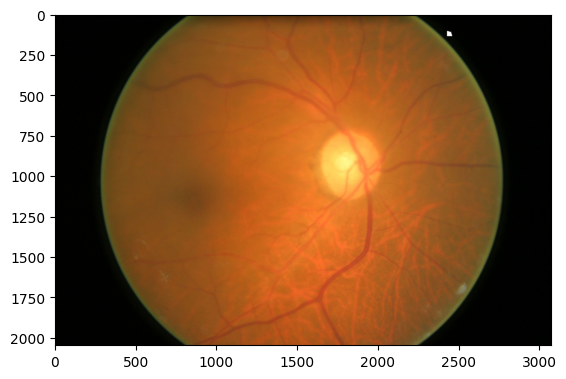

In [156]:
import cv2
from matplotlib import pyplot as plt
img = cv2.imread('dataset/yes/037.jpg')
plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
plt.show()

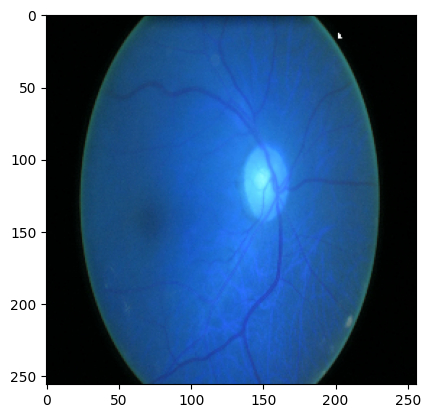

In [157]:
resize = tf.image.resize(img, (256,256))
plt.imshow(resize.numpy().astype(int))
plt.show()

In [158]:
resize.shape

TensorShape([256, 256, 3])

In [159]:
np.expand_dims(resize, 0).shape

(1, 256, 256, 3)

In [160]:
yhat = model.predict(np.expand_dims(resize/255, 0))

1/1 [==============================] - 0s 20ms/step


In [161]:
yhat

array([[0.24987581]], dtype=float32)

In [162]:
if yhat >  0.2:
    print(f"Glaucoma detected")
else:
    print(f"Glaucoma not detected")

Glaucoma detected


5. Save the Model

5.1 Save the Model

In [133]:
from tensorflow.keras.models import load_model

In [134]:
model.save(os.path.join('models','Glaucoma.h5'))

In [135]:
new_model = load_model(os.path.join('models', 'Glaucoma.h5'))

In [136]:
new_model.predict(np.expand_dims(resize/255,0))

1/1 [==============================] - 0s 82ms/step


array([[0.11465915]], dtype=float32)